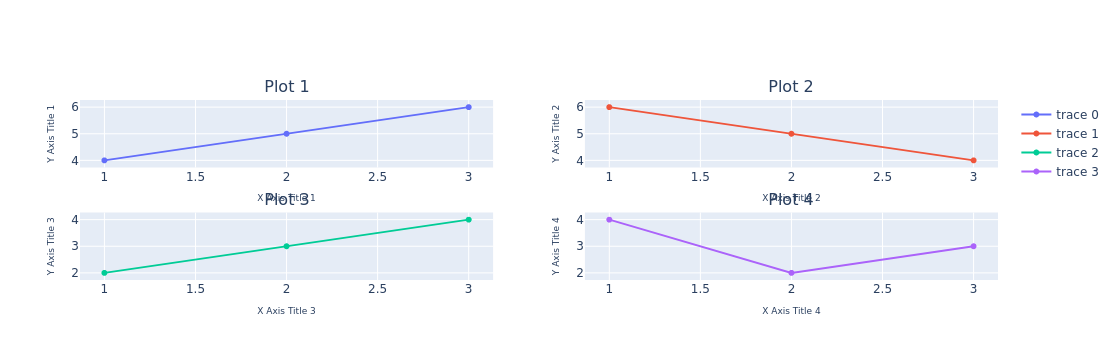

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4")
)

# Add traces to the subplots
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]), row=1, col=1)
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[6, 5, 4]), row=1, col=2)
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[2, 3, 4]), row=2, col=1)
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 2, 3]), row=2, col=2)

# Update x-axes with custom standoff and font size
fig.update_xaxes(title_text="X Axis Title 1", title_standoff=10, title_font=dict(size=9), row=1, col=1)
fig.update_xaxes(title_text="X Axis Title 2", title_standoff=10, title_font=dict(size=9), row=1, col=2)
fig.update_xaxes(title_text="X Axis Title 3", title_standoff=10, title_font=dict(size=9), row=2, col=1)
fig.update_xaxes(title_text="X Axis Title 4", title_standoff=10, title_font=dict(size=9), row=2, col=2)

# Update y-axes with custom standoff and font size
fig.update_yaxes(title_text="Y Axis Title 1", title_standoff=10, title_font=dict(size=9), row=1, col=1)
fig.update_yaxes(title_text="Y Axis Title 2", title_standoff=10, title_font=dict(size=9), row=1, col=2)
fig.update_yaxes(title_text="Y Axis Title 3", title_standoff=10, title_font=dict(size=9), row=2, col=1)
fig.update_yaxes(title_text="Y Axis Title 4", title_standoff=10, title_font=dict(size=9), row=2, col=2)

# Show the figure
fig.show()


In [2]:
import numpy as np

from data_utils import compute_pairs_euclidean_distances, load_numpy_data, save_numpy_array

from psf_constants import PROCESSED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          PROCESSED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          PROCESSED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          PROCESSED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          PROCESSED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          CROPPED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          CROPPED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          CROPPED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          CROPPED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          CROPPED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          FC_PREDICTED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          FC_PREDICTED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          FC_PREDICTED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          FC_PREDICTED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          FC_PREDICTED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          FC_PREDICTED_CROPPED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          FC_PREDICTED_CROPPED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          FC_PREDICTED_CROPPED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          FC_PREDICTED_CROPPED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          FC_PREDICTED_CROPPED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          ZERNIKE_TRAIN_EUCLIDEAN_DISTANCES_PREFIX, \
                          ZERNIKE_TRAIN_EUCLIDEAN_DISTANCES_PREFIX, \
                          ZERNIKE_TRAIN_EUCLIDEAN_DISTANCES_PAIRS_PREFIX, \
                          PL42_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PL42_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PL42_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PL42_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PL42_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PL42_TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          PL42_TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          PL42_TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          PL42_TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          PL42_TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          PL42_ZERNIKE_TRAIN_EUCLIDEAN_DISTANCES_PREFIX, \
                          PL42_ZERNIKE_TRAIN_EUCLIDEAN_DISTANCES_PAIRS_PREFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          NUMPY_SUFFIX

In [3]:
PATHS_DICTIONARY = {
    "TR2": [PROCESSED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            FC_PREDICTED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            CROPPED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            FC_PREDICTED_CROPPED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
            [2,3]],
    
    "TR5": [PROCESSED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            FC_PREDICTED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            CROPPED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            FC_PREDICTED_CROPPED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
            [2, 3, 4, 5, 6]],
    
    "TR9": [PROCESSED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            FC_PREDICTED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            CROPPED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            FC_PREDICTED_CROPPED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
            [2, 3, 4, 5, 6, 7, 8, 9, 10]],
    
    "TR14": [PROCESSED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             FC_PREDICTED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             CROPPED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             FC_PREDICTED_CROPPED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
             TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
             [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    
    "TR20": [PROCESSED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             FC_PREDICTED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             CROPPED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             FC_PREDICTED_CROPPED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
             TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
             [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17 , 18, 19, 20, 21]],
}

In [4]:
def create_path(prefix, suffix):
    data_path = f"{prefix}{suffix}{NUMPY_SUFFIX}"
    return data_path

def create_random_pair_indexes(array_n_points, pairs_per_subset=10000):
    selected_pairs = np.random.randint(0, array_n_points, size=(pairs_per_subset, 2))
    selected_pairs = selected_pairs[selected_pairs[:, 0] != selected_pairs[:, 1]]
    
    while selected_pairs.shape[0] < pairs_per_subset:
        more_pairs = np.random.randint(0, 100, size=(pairs_per_subset, 2))
        more_pairs = more_pairs[more_pairs[:, 0] != more_pairs[:, 1]]
        selected_pairs = np.concatenate((selected_pairs, more_pairs))
        
    return selected_pairs[:pairs_per_subset]

# 1. Brute Force

In [5]:
for suffix in PSF_TRAIN_FILE_SUFFIXES:
    distances = []
    
    # Select pairs to compute euclidean distances
    n_points = 10000
    pairs_path = create_path(ZERNIKE_TRAIN_EUCLIDEAN_DISTANCES_PAIRS_PREFIX, suffix)
    selected_pairs = np.load(pairs_path)
    #selected_pairs = create_random_pair_indexes(n_points, pairs_per_subset=10000)
    
    for dataset_name, dataset_info in PATHS_DICTIONARY.items():
        cf_path_prefix = dataset_info[0]
        pred_cf_path_prefix = dataset_info[1]
        cropped_cf_path_prefix = dataset_info[2]
        predicted_cropped_cf_path_prefix = dataset_info[3]
        flux_prefix = dataset_info[4]
        lp_modes_prefix = dataset_info[5]

        # Define data paths
        fluxes_path = create_path(flux_prefix, suffix)
        complex_fields_path = create_path(cf_path_prefix, suffix)
        predicted_complex_fields_path = create_path(pred_cf_path_prefix, suffix)
        cropped_complex_fields_path = create_path(cropped_cf_path_prefix, suffix)
        predicted_cropped_complex_fields_path = create_path(predicted_cropped_cf_path_prefix, suffix)
        lp_modes_path = create_path(lp_modes_prefix, suffix)
        
    
        # Load data
        fluxes = load_numpy_data(fluxes_path)
        complex_fields = load_numpy_data(complex_fields_path)
        predicted_complex_fields = load_numpy_data(predicted_complex_fields_path)
        cropped_complex_fields = load_numpy_data(cropped_complex_fields_path)
        predicted_cropped_complex_fields = load_numpy_data(predicted_cropped_complex_fields_path)
        lp_modes = load_numpy_data(lp_modes_path)
        print(lp_modes.shape)
    
    
        # Compute fluxes euclidean distances
        fluxes_euclidean_distances = compute_pairs_euclidean_distances(fluxes,
                                                                       selected_pairs)
        distances.append(fluxes_euclidean_distances.reshape(-1, 1))

        # Compute lp modes euclidean distances
        lp_modes_euclidean_distances = compute_pairs_euclidean_distances(lp_modes,
                                                                         selected_pairs,
                                                                         is_lp_coefficients=True)
        distances.append(lp_modes_euclidean_distances.reshape(-1, 1))

        # Compute complex_fields euclidean distances
        complex_fields_euclidean_distances = compute_pairs_euclidean_distances(complex_fields,
                                                                               selected_pairs,
                                                                               is_complex_field=True)
        distances.append(complex_fields_euclidean_distances.reshape(-1, 1))

        # Compute predicted complex fields euclidean distances
        predicted_complex_fields_euclidean_distances = compute_pairs_euclidean_distances(predicted_complex_fields,
                                                                                         selected_pairs,
                                                                                         is_complex_field=True)
        distances.append(predicted_complex_fields_euclidean_distances.reshape(-1, 1))

        # Compute cropped complex fields euclidean distances
        cropped_complex_fields_euclidean_distances = compute_pairs_euclidean_distances(cropped_complex_fields,
                                                                                       selected_pairs,
                                                                                       is_complex_field=True)
        distances.append(cropped_complex_fields_euclidean_distances.reshape(-1, 1))

        # Compute predictd cropped complex fields euclidean distances
        predicted_cropped_complex_fields_euclidean_distances = compute_pairs_euclidean_distances(predicted_cropped_complex_fields,
                                                                                                 selected_pairs,
                                                                                                 is_complex_field=True)
        distances.append(predicted_cropped_complex_fields_euclidean_distances.reshape(-1, 1))
        
    # Merge in columns
    euclidean_distances = np.concatenate(distances, 
                                         axis=1)

    # Save arrays
    pairs_path = create_path(ZERNIKE_TRAIN_EUCLIDEAN_DISTANCES_PAIRS_PREFIX, suffix)
    euclidean_distances_path = create_path(ZERNIKE_TRAIN_EUCLIDEAN_DISTANCES_PREFIX, suffix)
    #save_numpy_array(selected_pairs, pairs_path, single_precision=False)
    save_numpy_array(euclidean_distances, euclidean_distances_path)

(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)
(10000, 2, 19)


### For 42 waveguide PL

In [3]:
PATHS_DICTIONARY = {
    "TR2": [PROCESSED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            PL42_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            PL42_TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
            [2,3]],
    
    "TR5": [PROCESSED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            PL42_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            PL42_TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
            [2, 3, 4, 5, 6]],
    
    "TR9": [PROCESSED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            PL42_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            PL42_TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
            [2, 3, 4, 5, 6, 7, 8, 9, 10]],
    
    "TR14": [PROCESSED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             PL42_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
             PL42_TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
             [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    
    "TR20": [PROCESSED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             PL42_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
             PL42_TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
             [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17 , 18, 19, 20, 21]],
}

In [5]:
for suffix in PSF_TRAIN_FILE_SUFFIXES:
    distances = []
    
    # Select pairs to compute euclidean distances
    n_points = 10000
    selected_pairs = create_random_pair_indexes(n_points, pairs_per_subset=10000)
    
    for dataset_name, dataset_info in PATHS_DICTIONARY.items():
        cf_path_prefix = dataset_info[0]
        flux_prefix = dataset_info[1]
        lp_modes_prefix = dataset_info[2]

        # Define data paths
        fluxes_path = create_path(flux_prefix, suffix)
        complex_fields_path = create_path(cf_path_prefix, suffix)
        lp_modes_path = create_path(lp_modes_prefix, suffix)
        
    
        # Load data
        fluxes = load_numpy_data(fluxes_path)
        complex_fields = load_numpy_data(complex_fields_path)
        lp_modes = load_numpy_data(lp_modes_path)
    
    
        # Compute fluxes euclidean distances
        fluxes_euclidean_distances = compute_pairs_euclidean_distances(fluxes,
                                                                       selected_pairs)
        distances.append(fluxes_euclidean_distances.reshape(-1, 1))

        # Compute lp modes euclidean distances
        lp_modes_euclidean_distances = compute_pairs_euclidean_distances(lp_modes,
                                                                         selected_pairs)
        distances.append(lp_modes_euclidean_distances.reshape(-1, 1))

        # Compute complex_fields euclidean distances
        complex_fields_euclidean_distances = compute_pairs_euclidean_distances(complex_fields,
                                                                               selected_pairs,
                                                                               is_complex_field=True)
        distances.append(complex_fields_euclidean_distances.reshape(-1, 1))
        
    # Merge in columns
    euclidean_distances = np.concatenate(distances, 
                                         axis=1)

    # Save arrays
    pairs_path = create_path(PL42_ZERNIKE_TRAIN_EUCLIDEAN_DISTANCES_PAIRS_PREFIX, suffix)
    euclidean_distances_path = create_path(PL42_ZERNIKE_TRAIN_EUCLIDEAN_DISTANCES_PREFIX, suffix)
    save_numpy_array(selected_pairs, pairs_path, single_precision=False)
    save_numpy_array(euclidean_distances, euclidean_distances_path)